# Model Fitting in Python

In this worksheet we are going to look at how we might use python to fit data
models. Later we will look at machine learning, but for now we will concentrate
on traditional approaches to model fitting.

*Note: it is common to find snippets of code for a task. There are so many python libraries it is not feasible to know all of the different libraries and codes. This has given rise to a mode of programming where individuals look for answers of stack overflow etc. This is now common practice for data exploration in Python. It does raise questions about attribution however and certaintly this would be bad practive for safety critical software development.*

Let's start with a quick reminder about straight lines.

These are descibed with a simple equation.

$y = mx + c$

The code below shows a graph showing how $m$ says how much the line changes in the $y$ axis for every step in the $x$ axis. $c$ tells us the point on the $y$ axis where we cross when $x = 0$.

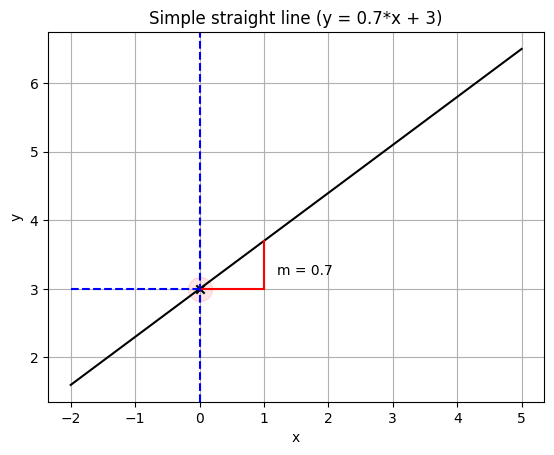

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.array([-2,-1, 0, 1, 2, 3, 4, 5])
y = 0.7*x + 3

plt.plot(x, y, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple straight line (y = 0.7*x + 3)')
plt.grid()
plt.scatter(0,3,color='red', marker="o", alpha=0.1, s=300)
plt.scatter(0,3,color='black', marker="x")
plt.plot([0,1], [3,3], 'r')
plt.plot([1,1], [3,3.7], 'r')

plt.plot([-2,0],[3,3], color='blue', linestyle='--')
plt.axvline(x = 0.0, color = 'blue', linestyle = '--')

plt.text(1.2, 3.2, 'm = 0.7')



plt.show()

In [29]:
# So if I'm given two points on the axis can we write a function to give us the values of m and c?


def getline(x1, y1, x2, y2):
  m = (y2 - y1)/(x2 - x1)
  c = y1 - m*x1
  return m, c

# now let's test it.
(m,c) = getline(0,3,1,3.7)
print(m,c)

# does this give you the answer your expect?

0.7000000000000002 3.0


In [30]:
# generate some data with noise

x = np.arange(0.0, 5.0, 0.1)
noise =  np.random.normal(0,0.5, size =len(x))
y = 0.7*x + 3
y = y+ noise

In [31]:
data = np.vstack((x,y))
data = data.T
df = pd.DataFrame(data, columns=['x','y'])
df.head()
df.to_csv('noisy_line.csv')

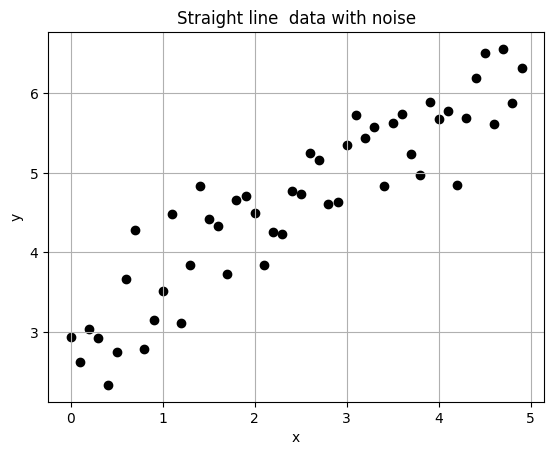

In [32]:
plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Straight line  data with noise')
plt.grid()

In [33]:
df = pd.read_csv('noisy_line.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.0,2.941578
1,1,0.1,2.626081
2,2,0.2,3.043208
3,3,0.3,2.922831
4,4,0.4,2.333936


<Axes: xlabel='x', ylabel='y'>

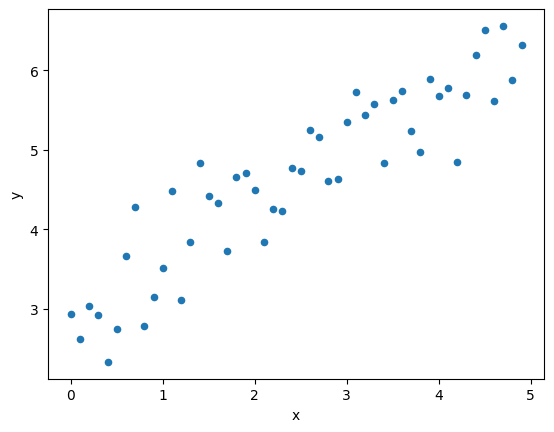

In [34]:
df.plot.scatter(x='x', y='y')

In [35]:
# now we have our data let's look at how we can use python to fit a straight line to it

# First we need to estimate what type of model will fit. In this case we believe it's
# a straight line, which we call 'linear' so we use a technique called linear regression
# which will try to minimise the errors for every point.
from sklearn.linear_model import LinearRegression


# Then we simply call the fitting function.
reg = LinearRegression().fit(df[['x']], df.y)

# having run the fitting function we can now look at the results
print(f" m {reg.coef_}, c : {reg.intercept_}")



 m [0.69884068], c : 2.919523897650603


In [36]:
# Now we could use these coefficients directly, but let's make use of a function
# that the regression package gives is. it's called predict.
# Now the prediction function expects an array as the input and the easiest way
# to do this is to create a data frame

v= 6
input_value = pd.DataFrame([v], columns=['x'])

value_predicted = reg.predict(input_value)
print(f"For an input of {v} we value_predicted {value_predicted}")

For an input of 6 we value_predicted [7.11256797]


In [37]:
# Given that we have a vector of x values alredy ...
df[['x']].head(5)

,x
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


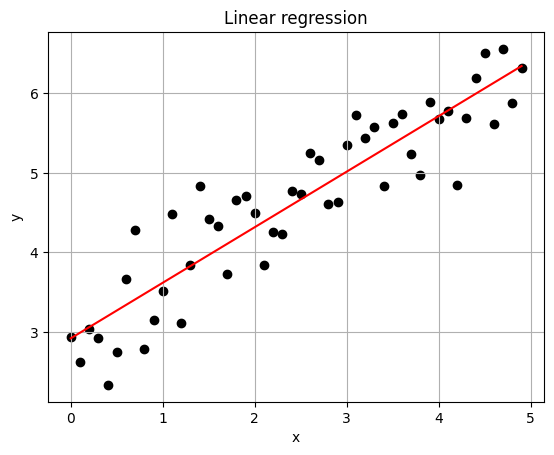

In [38]:
# we can use this to see how good our fit was.

plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression')
plt.plot(x, reg.predict(df[['x']]), color='red')
plt.grid()

# Polynomial fitting

Having looked at straight lines we now turn our attention to fitting more complex functions.

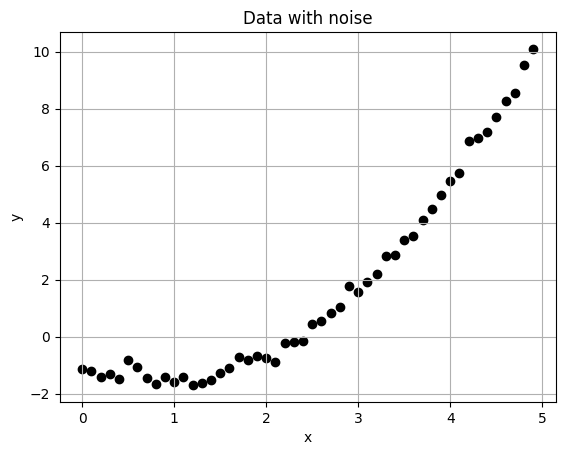

In [39]:

x = np.arange(0.0, 5.0, 0.1)
noise =  np.random.normal(0,0.2, size =len(x))
y = 0.7*x**2 - 1.2*x -1
y += noise


plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid()

data = np.vstack((x,y))
data = data.T
df = pd.DataFrame(data, columns=['x','y'])
df.head()
df.to_csv('noisy_curve.csv')


 m [2.23803899], c : -3.7785165313836115


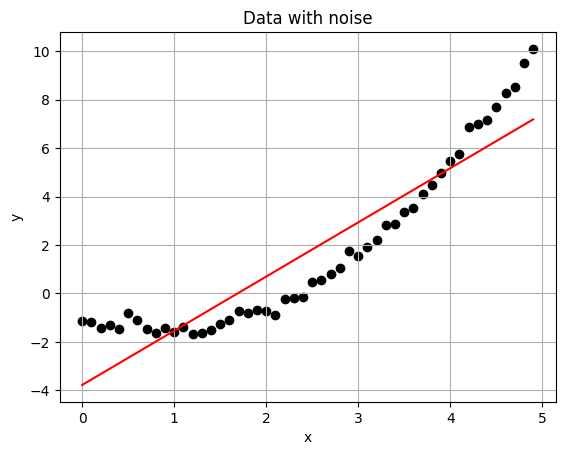

In [40]:
# let's try and fit a straight line to this.


# Then we simply call the fitting function.
reg = LinearRegression().fit(df[['x']], df.y)

# having run the fitting function we can now look at the results
print(f" m {reg.coef_}, c : {reg.intercept_}")


plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid()
plt.plot(x, reg.predict(df[['x']]), color='red')
plt.show()

Well that doesn't look great at the start or the end of the data.

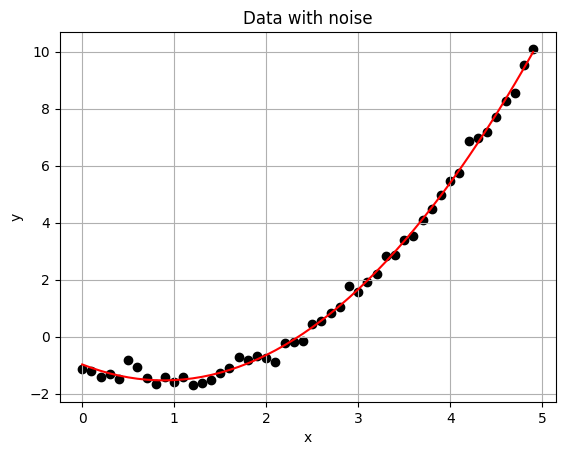

In [41]:
# But we might be able to guess that this is a quadratic.
# numpy gives us the option of fitting polynomials, so let's do that.

mymodel = np.poly1d(np.polyfit(df.x, df.y, 2))

plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid()
plt.plot(x, mymodel(df[['x']]), color='red')
plt.show()

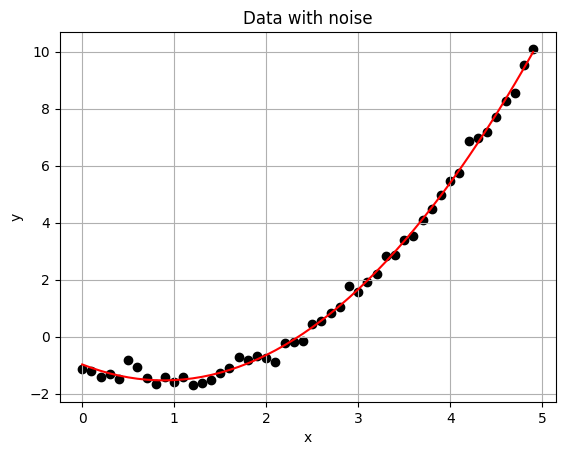

In [42]:
# there are other multiple libraries to do the same job.
# Here is an example that uses the sklearn library
# don't worry about the deatil here, just note that there
# are many ways to do the same thing in python

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(df[['x']], df.y)

plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid()
plt.plot(x, model.predict(df[['x']]), color='red')
plt.show()


In [43]:
# I'm going to leave line fitting here, but the basic idea is
# Think about what form of model is likely to work.
#
# 1. Find a library that supports model fitting of that form
# 2. Provide it with the data
# 3. Compare the predicted to the actual.
# 4. Use it to predict new values
# if the fit is poor then you (usually) have the wrong model or insufficient data

# Modelling with multiple inputs

So not all data is represented by a line in 2 dimensions. What happens if your function is some thing like

$y = 2 *x_1 + 3*x_2 - 2*x_1*x_2$




In [44]:
# Let's create some data in this form
# example taken from :
# https://realpython.com/linear-regression-in-python/#:~:text=Multiple%20Linear%20Regression%20With%20scikit%2Dlearn,-You%20can%20implement&text=The%20main%20difference%20is%20that,have%20two%20or%20more%20columns.&text=In%20multiple%20linear%20regression%2C%20x,usually%20a%20one%2Ddimensional%20array.


x1 = np.array([0,5,15,25,35,45,55,60])
x2 = np.array([1,1,2,5,11,15,34,35])

x = np.vstack((x1,x2))
y= [4,5,20,14,32,22,38, 43]

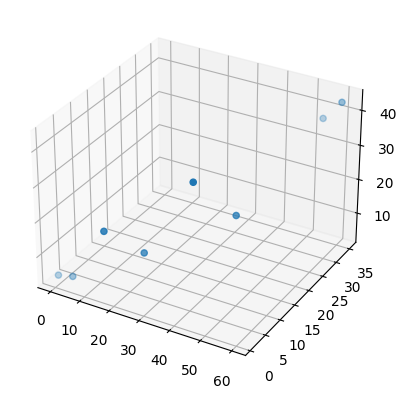

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0,:], x[1,:], y )
plt.show()

In [50]:
# The function expects the x data to be two columns, not rows hence I use a transpose.
# Try removing the transpose if you want to see the error message we get.print(f"intercept: {model.intercept_}")
model = LinearRegression().fit(x.transpose(), y)


In [53]:
r_sq = model.score(x.transpose(), y)
# coefficient of determination: 0 not predictive power, 1 perfectly correct.
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [56]:
y_pred = model.intercept_ + np.sum(model.coef_ * x.transpose(), axis=1)

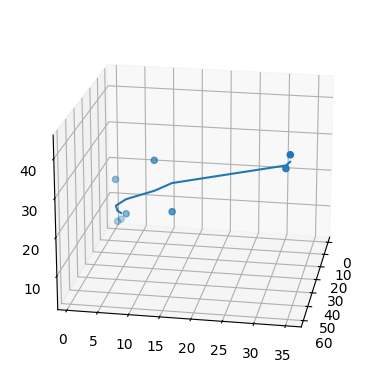

In [62]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0,:], x[1,:], y )
ax.plot(x[0,:], x[1,:], y_pred )
ax.view_init(elev=20., azim=10) # change thse values to change the 'camera' position
plt.show()

Note that moving about 2 inputs works jsut as well but we will find it much harder to visualise!

That's when metrics like coefficient of determination become more useful.

# Fitting parametric distributions

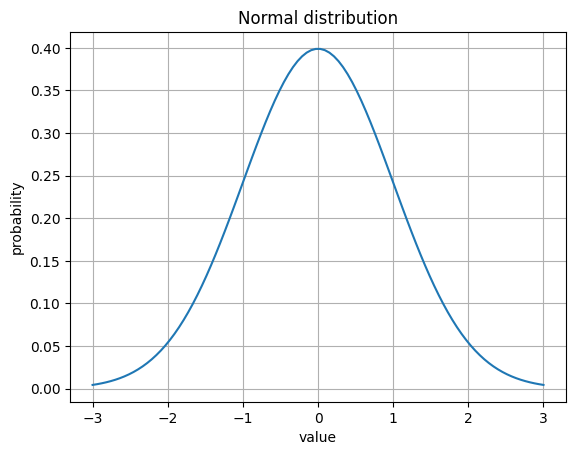

In [65]:
# So what di I mean by a parametric distribution?

import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.grid()
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Normal distribution')
plt.show()

Notice the parameters of the distribution are mu (or mean) and sigma (standard deviation or spread/scale).

In [67]:
# So if I have a set of samples I might want to work out the mean and spread.
# I'm not going to go into how we determine if a set of data is Gaussian, but
# be aware just like all other model fitting when we select our model it might be
# wrong, we jsut hope it's useful.

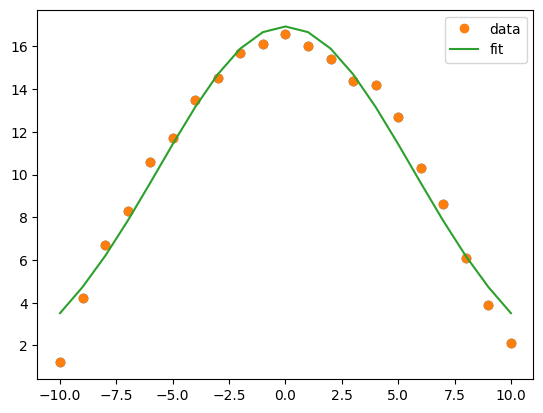

In [72]:
# Taken from : https://www.geeksforgeeks.org/python-gaussian-fit/

from scipy.optimize import curve_fit

xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

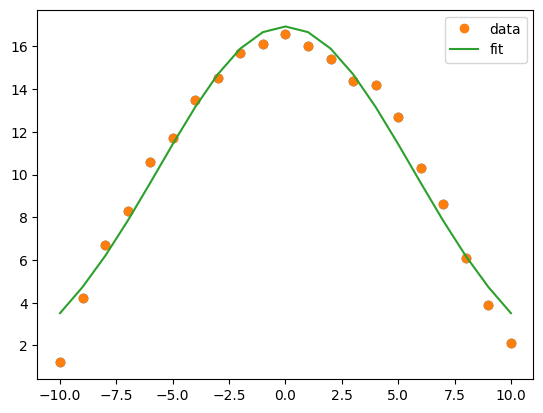

In [73]:
from scipy.optimize import curve_fit

xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

In [74]:
curve_fit?